In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression


In [43]:
data = pd.read_csv("AHD.csv")
data

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [44]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [45]:
data_copy=data.dropna(subset=['Median Household Income'])
data_copy

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [46]:
data_copy.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [47]:
data_copy.fillna(data_copy.mean)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [60]:
from sklearn.preprocessing import LabelEncoder
Address = LabelEncoder()
data_copy['Address'] = Address.fit_transform(data_copy['Address'])

City = LabelEncoder()
data_copy['City'] = City.fit_transform(data_copy['City'])

State = LabelEncoder()
data_copy['State'] = State.fit_transform(data_copy['State'])

County = LabelEncoder()
data_copy['County'] = County.fit_transform(data_copy['County'])

C:\Users\hp\AppData\Local\Temp\ipykernel_6596\2810926487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Address'] = Address.fit_transform(data_copy['Address'])
C:\Users\hp\AppData\Local\Temp\ipykernel_6596\2810926487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['City'] = City.fit_transform(data_copy['City'])
C:\Users\hp\AppData\Local\Temp\ipykernel_6596\2810926487.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [61]:
data_copy

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,33466,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,33466,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,5888,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,20577,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,35129,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,14873,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,18031,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,18322,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,20269,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223


In [64]:
x = data_copy.drop("Price",axis = 1)
y = data_copy["Price"]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size=0.25,random_state=90)

In [69]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
model.score(x_test, y_test)

0.3410544461141086

In [72]:
model.score(x_train,y_train)

0.45247802851195695

In [73]:
y_pred = model.predict(x_test)
y_pred

array([1396953.5084495 ,  445347.97298931,  334735.91728814, ...,
       1505734.65252871,  829514.07114327, 1251132.45626288])

In [74]:
pd.DataFrame({'True Value':y_test, 'Predicted Value': y_pred})

,True Value,Predicted Value
35580,1198000.0,1.396954e+06
29130,280000.0,4.453480e+05
21494,302500.0,3.347359e+05
31298,415000.0,8.025292e+05
37922,554726.0,6.899855e+05
...,...,...
23313,332790.0,3.234285e+05
811,432500.0,4.239167e+05
38822,850000.0,1.505735e+06
25186,750000.0,8.295141e+05


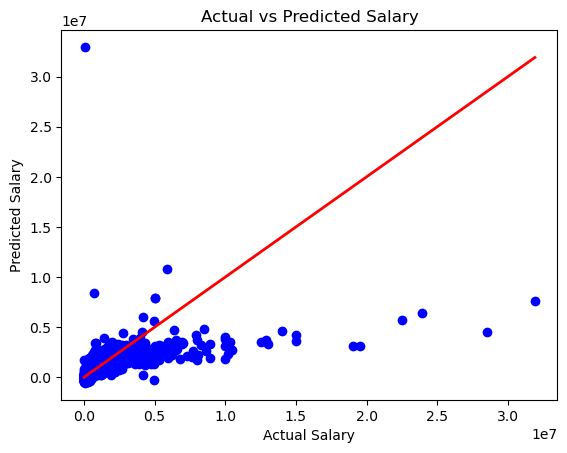

In [76]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()